<a href="https://colab.research.google.com/github/Glutamato/BasesSIR/blob/master/Copia_de_%5BPF_Bonus%5DDifferentialEvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Evolución diferencial aplicada a la regresion no lineal 

El (ya clásico) problema de encontrar la función matemática que mejor se ajuste a un cierto conjunto de datos, se traduce en lo que conocemos como optimización si vemos el problema como aquel en el cual buscamos reducir el error entre los datos que genera la funcion de ajuste y los datos reales del conjunto inicial que buscamos ajustar.

Para lograr esto la técnica mas sencilla es calculando el error total en términos de los parámetros de la función y calculando el mínimo de esa funcion con las técnicas tradicionales del calculo diferencial, si vemos el error $E$ como una función de los parámetros de ajuste de la funcion $f(x)$ que denonimamos $p$, entonces: 

$\nabla_{p} E = \vec{0}$

Sin embargo, cuando calcular las derivadas es demasiado complicado, se pueden usar métodos de optimización que no impliquen el calculo de las mismas. Entre estos métodos esta la técnica de Evolución diferencial el cual usaremos a continuación.


In [ ]:
#importamos dependencias necesarias para el ejercicio
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

El algoritmo DE (o de evolucion diferencial por sus siglas en ingles: Differental Evolution) pertenece a una clase de algoritmos denominados evolucionarios. Como su nombre lo indica, estos algoritmos siguen ideas de la teoria evolutiva de los seres vivos, de manera que el algoritmo funciona considerando un conjunto de individuos (cada individuo tiene un conjunto particular de parámetros de la funcion a optimizar) y se van escogiendo los candidatos más aptos según aquellos que mejor conducen hacia el mínimo global de la función. 

Así como en la evolución biológica, los candidatos mas aptos pasan por procesos de **mutación**, **recombinación** y **seleccion**, y de esa manera el algoritmo va mejorando la población de candidatos y al final va encontrando el mínimo global de la función. No tocaremos los detalles matemáticos de estas etapas de evolución, asi que solamente conideraremos una función en python que reproduce el algoritmo y que nos permitirá usarlo directamente en un problema sencillo de regresión no lineal: 

In [ ]:
# Differential evolution algorithm (considérenlo como un algoritmo black box)
def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=100):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        if (i%100==0):
            print(i)
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]

## Ejemplo: Proceso de Optimización 
Creamos una funcion (polinomio de grado 5): 

$$ f(x) = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + w_4 x^4 + w_5 x^5$$

que ajustará un conjunto de datos de tamaño $N$: 

$$ ((x_0, y_0), (x_1, y_1), \dots ) $$

El proceso de ajuste consiste en encontrar los valores de los coeficientes $$ (w_0, w_1, \dots, w_5) $$ que mejor ajustan el polinomio a los datos. Para esto  consideramos el conjunto generado por la función al evaluar esta en las coordenadas $x$ del conjunto original: 

$$ ((x_0, f(x_0)), (x_1, f(x_1)), \dots) $$

y calculamos el error cuadrático medio entre los valores $$ y $$ obtenidos de la función y los valores del conjunto original: 

$$ \Delta E = \frac{1}{N}\sqrt{\sum_{i}(y_i - f(x_i))^2}$$ 

este valor de error depende de los coeficientes que sean asignados a la función $$(w_0, w_1, \dots, w_5)$$, de manera que podemos pensar en el error como una funcion de estos coeficientes: 

$$ \Delta E = \Delta E (w_0, w_1, \dots, w_5) $$

y en este punto definimos el problema de ajustar la mejor funcion $f(x)$, como aquella cuyos coeficientes resultan en el mínimo valor posible de $\Delta E$ 

In [ ]:
# f(x)
def fmodel(x, w):
    return w[0] + w[1]*x + w[2] * x**2 + w[3] * x**3 + w[4] * x**4 + w[5] * x**5

# funcion de Error    
def rmse(w):
    y_pred = fmodel(x, w)
    return np.sqrt(sum((y - y_pred)**2) / len(y))

In [ ]:
# conjunto artificial de datos a ajustar (se introduce un ruido aleatorio para que los datos no sean tan fáciles de ajustar)
x = np.linspace(0, 10, 500)
y = fmodel(x, [1.0, -0.01, 0.01, -0.1, 0.1, -0.01]) + np.random.normal(0, 4.2, 500)

(-150.0, 150.0)

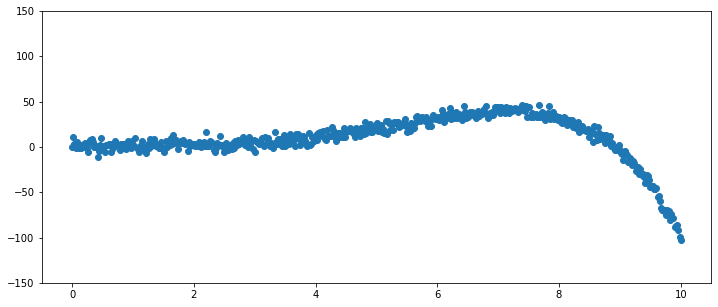

In [ ]:
#visualizacion de los datos originales
fig = plt.figure(figsize=(12,5))
plt.scatter(x, y)
plt.ylim([-150, 150])

In [ ]:
#optimizar
result = list(de(rmse, [(-5, 5)] * 6, its=2000))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [ ]:
# coeficientes resultantes de la última iteración
print(result[-1][0])
# error resultante de la última iteración
print(result[-1][1])

[ 1.33349689  0.55876635 -0.18920313 -0.08458846  0.1006277  -0.01007301]
4.149718926192533


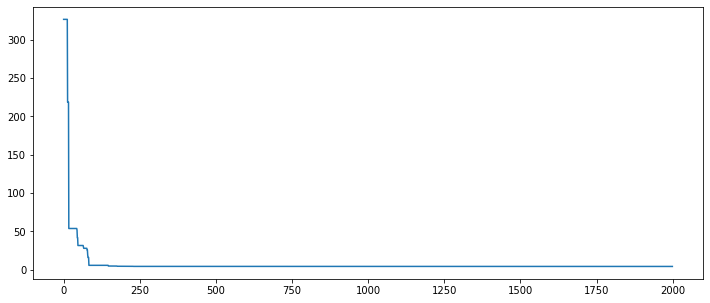

In [ ]:
# curva de error vs iteración
fig = plt.figure(figsize=(12,5))
errors = [res[1] for res in result]
plt.plot(errors)

## Comparación entre datos y la función ajustada
En esta sección evidenciamos como el algoritmo ajusta mejor la función objetivo a los datos a medida que aumenta el número de iteraciones $f(x)$

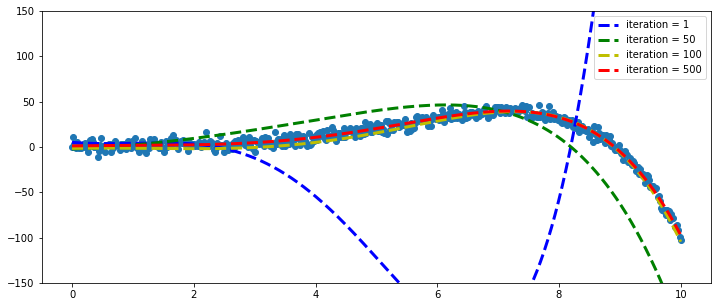

In [ ]:
#compare data and fitted function
fig = plt.figure(figsize=(12,5))
plt.scatter(x, y)
for i, color in zip([1, 50, 100, 500], ['b', 'g', 'y', 'r']):
    plt.plot(x, fmodel(x, result[i][0]), '--', c = color, label = 'iteration = {}'.format(i), linewidth = 3)
plt.ylim([-150, 150])
plt.legend()

## Referencias
* https://pablormier.github.io/2017/09/05/a-tutorial-on-differential-evolution-with-python/
* https://link.springer.com/article/10.1023%2FA%3A1008202821328
